<a href="https://colab.research.google.com/github/karineha1/MiniProject-1-GR83/blob/main/COMP_551_A1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GitPython
!pip install ucimlrepo
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install numpy





Defaulting to user installation because normal site-packages is not writeable
  Using cached gitpython-3.1.46-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached gitpython-3.1.46-py3-none-any.whl (208 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)

   ---------------------------------------- 0/3 [smmap]
   ---------------------------------------- 0/3 [smmap]
   ------------- -------------------------- 1/3 [gitdb]
   ------------- -------------------------- 1/3 [gitdb]
   ------------- -------------------------- 1/3 [gitdb]
   ------------- -------------------------- 1/3 [gitdb]
   -------------------------- ------------- 2/3 [GitPython]
   -------------------------- ------------- 2/3 [GitPython]
   -------------------------- ------------- 2/3 [GitPython]
   -------------------------- ------------- 2/3 [GitPytho


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from git import Repo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy as sc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings



In [5]:
# df = pd.read_csv("/content/day.csv") # in colab
df = pd.read_csv("day.csv")
np.random.seed(0)

In [6]:
# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

df = X.copy()

for col in y.columns:
  df[col] = y[col]

print (df.head())

print (df.isna().sum())
#There are no missing values


# Create dataframe
df = bike_sharing.data.features.copy()
df['cnt'] = bike_sharing.data.targets  # Add target variable


#Date is alredy decomposed in the other components
df = df.drop('dteday', axis = 1).copy()




       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


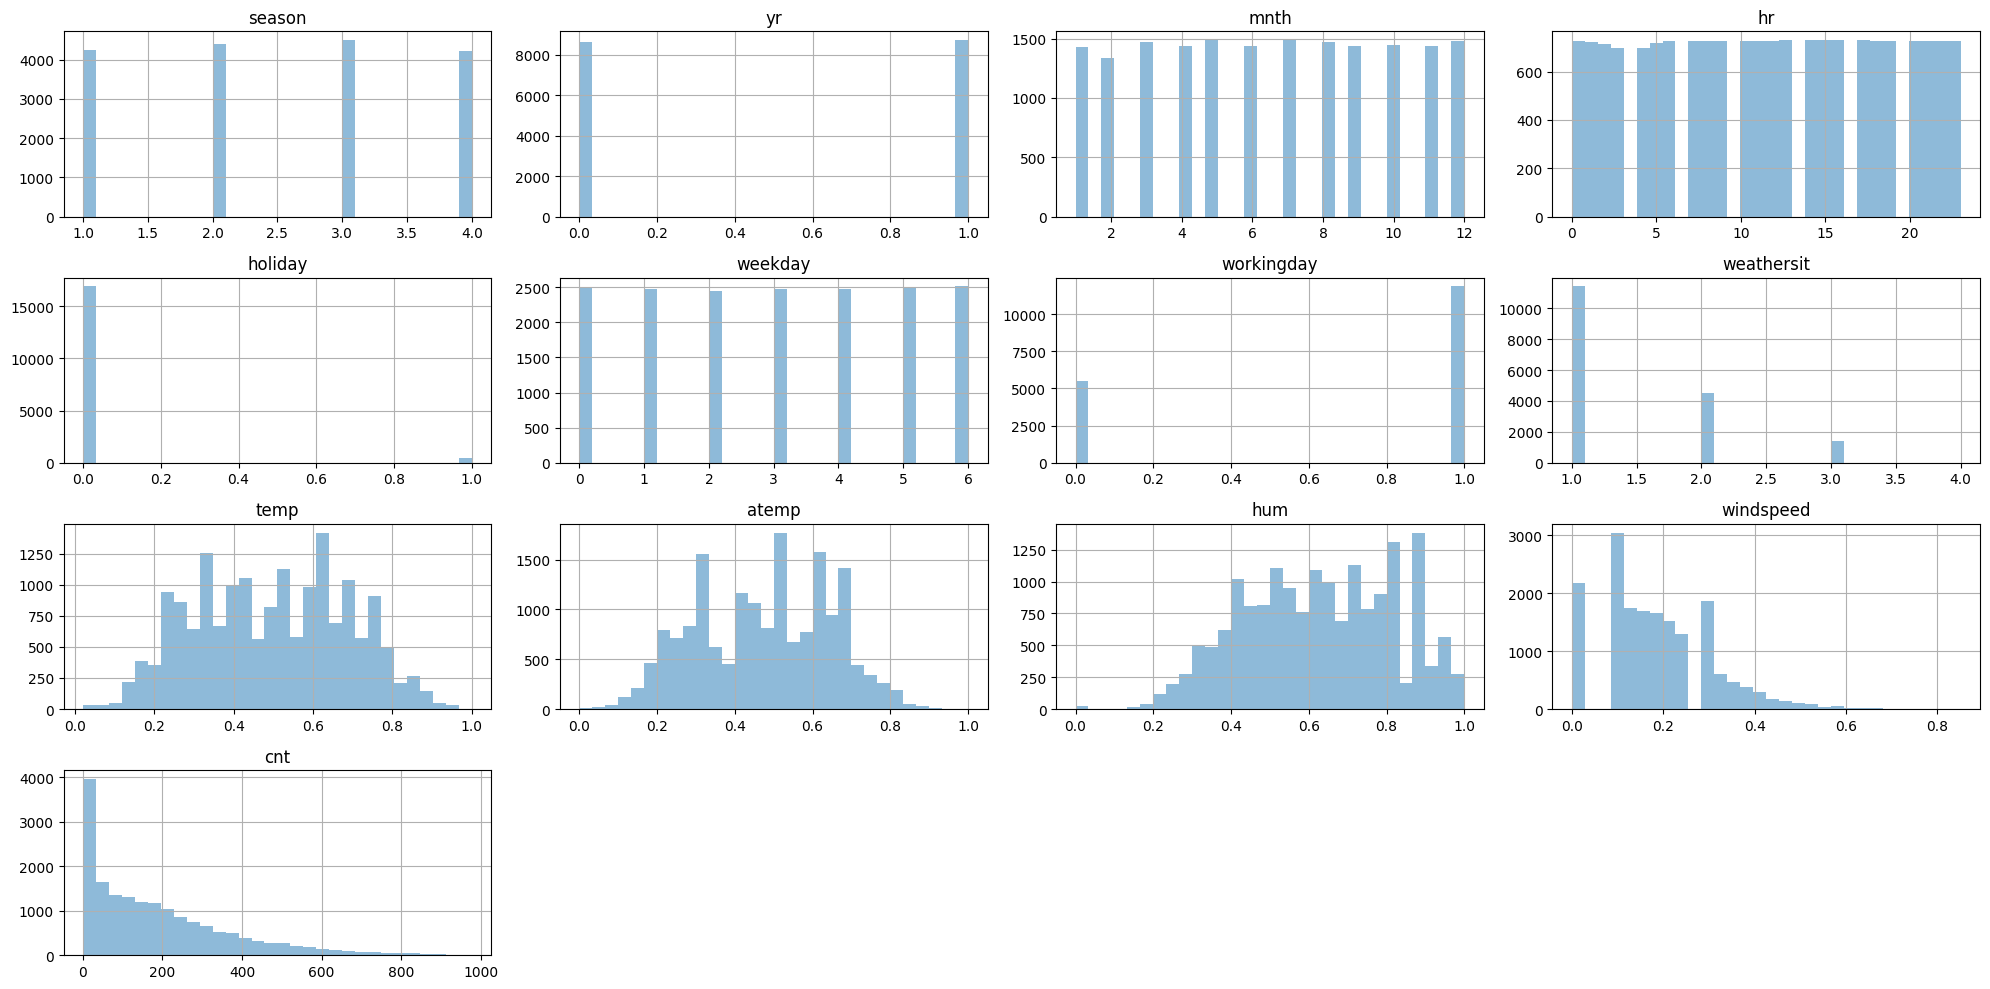

In [7]:
df.hist(alpha=0.5, figsize=(20, 10), bins = 30)
plt.tight_layout()
plt.show()

In [8]:
# Model
class LinearRegression:
  def __init__(self, add_bias = True):
    """
    Initializes Linear Regression Model.
    Parameters:
    add_bias: if True, adds an intercept term (bias/w_0) to the model
    """
    self.add_bias = add_bias
    self.w = None

  def fit (self, x, y):
    """
    Fit the linear regression model by computing optimal weights.
    Parameters:
    x: input features, shape (N,) or (N, D) where N = samples, D = features
    y: target values, shape (N,)
    """

    x = np.asarray(x, dtype = np.float32)
    y = np.asarray(y, dtype = np.float32)


    if x.ndim == 1:
      x = x[:, None]

    N = x.shape[0]

    if self.add_bias:
      x = np.column_stack([x, np.ones(N)])

    #Solve the least squares value

    self.w = np.linalg.lstsq(x, y, rcond=None)[0]

    return self


  def predict (self, x):
    """
    Predict target values for input x using learned weights.

    Parameters:
    x: input features, shape(N,) or (N, D) where N is the number of samples and
    D is the number of features

    Returns:
    y_pred: predicted target values, shape (N,)
    """
    if self.add_bias:
      x = np.column_stack([x, np.ones(x.shape[0])])

    # Matrix multiplication: x@w computes predictions
    # If x is (N, D+1) and w is (D+1,), the result is (N,)
    yh = x@self.w

    return yh

  def score (self, y, yh):
    """
    Calculate mean squared error for the given data
    """
    mse = np.mean((y - yh)**2)
    return mse


In [38]:
# 2.2 Train/Test Split

df['traintest'] = np.random.rand(len(df))
X_train = df[df['traintest'] > 0.5].copy()
X_test = df[df['traintest'] <= 0.5].copy()


In [39]:
def evaluate(train, test):
    #2.3 Evaluation
    train_x = train.drop('cnt', axis = 1)
    train_y = train['cnt']

    test_x = test.drop('cnt', axis = 1)
    test_y = test['cnt']

    model = LinearRegression(add_bias = True)
    model.fit(train_x, train_y)
    train_yh = model.predict(train_x)
    test_yh = model.predict(test_x)

    train_mse = model.score(train_y, train_yh)
    test_mse = model.score(test_y, test_yh)

    norm_train_mse = train_mse/train_x.shape[0]
    norm_test_mse = test_mse/test_x.shape[0]

    print("Train MSE: ", norm_train_mse)
    print("Test MSE: ", norm_test_mse)

In [40]:
# Evalute dataset with linear features

evaluate(X_train, X_test)

Train MSE:  2.2841774621342674
Test MSE:  2.34522647639715


In [45]:
## Task 3: Non-linear feature engineering

poly_cols = ['temp', 'windspeed']

train_fe = X_train.copy()
test_fe  = X_test.copy()

for c in poly_cols:
    train_fe[c + "_sq"] = train_fe[c] ** 2
    test_fe[c + "_sq"]  = test_fe[c] ** 2

evaluate(train_fe, test_fe)


Train MSE:  2.2757381983862133
Test MSE:  2.3446445911288736


In [50]:
# Interactions between features

train_fe = X_train.copy()
test_fe  = X_test.copy()

# Weather interactions
train_fe["temp_x_hum"] = train_fe["temp"] * train_fe["hum"]
test_fe["temp_x_hum"]  = test_fe["temp"] * test_fe["hum"]

train_fe["temp_x_wind"] = train_fe["temp"] * train_fe["windspeed"]
test_fe["temp_x_wind"]  = test_fe["temp"] * test_fe["windspeed"]

# Hourly interaction (only if hr exists)
if "hr" in train_fe.columns:
    train_fe["hr_x_workingday"] = train_fe["hr"] * train_fe["workingday"]
    test_fe["hr_x_workingday"]  = test_fe["hr"] * test_fe["workingday"]

evaluate(train_fe, test_fe)

Train MSE:  2.2429165782720375
Test MSE:  2.302931444922483


In [48]:
log_cols = ['temp']

train_fe = X_train.copy()
test_fe  = X_test.copy()

for c in log_cols:
    train_fe["log1p_" + c] = np.log1p(train_fe[c])
    test_fe["log1p_" + c]  = np.log1p(test_fe[c])

evaluate(train_fe, test_fe)

Train MSE:  2.2841717177327445
Test MSE:  2.3453151187410333
